In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import unidecode

import folium
from folium import plugins

import geopy
from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="https://nominatim.openstreetmap.org/")
geolocator = Nominatim(user_agent="https://maps.googleapis.com/")

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
#reading/storing and showing the Covid dataset of Colombia
df=pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,...,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,...,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,...,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,...,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,...,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN


In [3]:
#show the features and the len of the data
df.shape

(357710, 21)

We have 22 different geatures and 357710 of data

In [4]:
#show the all the features (columns)
df.columns

Index(['ID de caso', 'Fecha de notificación', 'Código DIVIPOLA',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'fecha reporte web', 'Tipo recuperación', 'Codigo departamento',
       'Codigo pais', 'Pertenencia etnica', 'Nombre grupo etnico'],
      dtype='object')

In [5]:
# info() show a description indicating the values and type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357710 entries, 0 to 357709
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID de caso                357710 non-null  int64  
 1   Fecha de notificación     357710 non-null  object 
 2   Código DIVIPOLA           357710 non-null  int64  
 3   Ciudad de ubicación       357710 non-null  object 
 4   Departamento o Distrito   357710 non-null  object 
 5   atención                  356965 non-null  object 
 6   Edad                      357710 non-null  int64  
 7   Sexo                      357710 non-null  object 
 8   Tipo                      357710 non-null  object 
 9   Estado                    356945 non-null  object 
 10  País de procedencia       955 non-null     object 
 11  FIS                       357710 non-null  object 
 12  Fecha de muerte           12530 non-null   object 
 13  Fecha diagnostico         353946 non-null  o

there are some features with missing values and erratic dtypes, in order to fix that we need to look each of them.

In [6]:
# Looking the structure of the date features 
col_de_fechas=['Fecha de notificación', 'FIS','Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado','fecha reporte web']
df[col_de_fechas].head()

,Fecha de notificación,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,2020-03-02T00:00:00.000,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2020-03-06T00:00:00.000,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,2020-03-07T00:00:00.000,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,2020-03-09T00:00:00.000,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,2020-03-09T00:00:00.000,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


Notice that each date feature have a T between the date and the time, so we need to remove the T and remove the time, as we only have 00:00:00:000

In [7]:
# the following code remove the T from the dates features but also store the time in the unwanted column
for fechas in col_de_fechas:
    df[[fechas,'unwanted']]=df[fechas].str.split(pat="T",expand=True)

In [8]:
df[col_de_fechas].head()

,Fecha de notificación,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,2020-03-02,2020-02-27,NaN,2020-03-06,2020-03-13,2020-03-06
1,2020-03-06,2020-03-04,NaN,2020-03-09,2020-03-19,2020-03-09
2,2020-03-07,2020-02-29,NaN,2020-03-09,2020-03-15,2020-03-09
3,2020-03-09,2020-03-06,NaN,2020-03-11,2020-03-26,2020-03-11
4,2020-03-09,2020-03-08,NaN,2020-03-11,2020-03-23,2020-03-11


In [9]:
df['unwanted'].unique()

array(['00:00:00.000'], dtype=object)

As unwanted does provide a useful time, we will get rid of that feature

In [10]:
#drop the column unwanted and save the changes to the df (inplace=True)
df.drop(columns=['unwanted'],inplace=True)

Now we transform the dtype form objecto to a datetime format

In [11]:
fechas_to_date=['Fecha de notificación','Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado','fecha reporte web']

for fechas in fechas_to_date:
    df[fechas]= pd.to_datetime(df[fechas],format='%Y-%m-%d')

In [12]:
#Create a new column called Asintomático FIS to store  the values of 'Asintomático' from FIS
df['Asintomático FIS']=df['FIS'].apply(lambda x: 'Asintomático' if x=='Asintomático' else np.nan)
#Removing 'Asintomático' from FIS columns and convert to datetime
df.FIS=df['FIS'].apply(lambda x:  pd.NaT if x=='Asintomático' else pd.to_datetime(x,format='%Y-%m-%d'))

In [13]:
df.select_dtypes(include='datetime').dtypes

Fecha de notificación    datetime64[ns]
FIS                      datetime64[ns]
Fecha de muerte          datetime64[ns]
Fecha diagnostico        datetime64[ns]
Fecha recuperado         datetime64[ns]
fecha reporte web        datetime64[ns]
dtype: object

In [14]:
print(df.Estado.unique())
print(df.Tipo.unique())
print(df.atención.unique())

['Leve' 'Asintomático' 'Fallecido' 'Moderado' 'Grave' nan]
['Importado' 'Relacionado' 'En estudio' 'RELACIONADO' 'EN ESTUDIO']
['Recuperado' 'Fallecido' 'Hospital' 'Hospital UCI' nan 'Casa']


Notice that some feature have duplicated values, so we goin to see me unique values for certain features

In [15]:
for columna in df.select_dtypes(exclude='datetime').columns:#.drop(['ID de caso','Código DIVIPOLA','Ciudad de ubicación'],axis=1).columns:
    print('------------------------------------------')
    print(columna)
    print(len(df[columna].unique()))

------------------------------------------
ID de caso
357710
------------------------------------------
Código DIVIPOLA
927
------------------------------------------
Ciudad de ubicación
861
------------------------------------------
Departamento o Distrito 
37
------------------------------------------
atención
6
------------------------------------------
Edad
111
------------------------------------------
Sexo
4
------------------------------------------
Tipo
5
------------------------------------------
Estado
6
------------------------------------------
País de procedencia
47
------------------------------------------
Tipo recuperación
3
------------------------------------------
Codigo departamento
33
------------------------------------------
Codigo pais
40
------------------------------------------
Pertenencia etnica
5
------------------------------------------
Nombre grupo etnico
891
------------------------------------------
Asintomático FIS
2


In order to fix duplicate values were are goin to  remove punctuation and only leave uppercase strings.
For numeric values is a bit more difficult as we have codes for municipalities, but we can see the Edad (Age) feature.

---------

In [16]:
#example of the strip function for str values
txt = ",,,!!!,,r--rttgg...   ..bananá....__rrr"
x = txt.strip(",.grt! -_")
print(x)

bananá


In [17]:
# Example of how to remove accent
accented_string = 'Málaga'
# accented_string is of type 'unicode'
import unidecode
unidecode.unidecode(accented_string)
# unaccented_string contains 'Malaga'and is of type 'str'

'Malaga'

In [18]:
unidecode.unidecode(accented_string.upper())

'MALAGA'

-------

For categorical variables we'll change nan values to a 'No info' string

In [19]:
# Filling nan values, applying uppes case and remove accent for each value of each feature
for feature in df.select_dtypes(include=['object']).columns:
    df[feature]=df[feature].fillna('No info')
    df[feature]=df[feature].apply(lambda x: unidecode.unidecode(x.upper()))
    print('Compleated feature: '+feature)

Compleated feature: Ciudad de ubicación
Compleated feature: Departamento o Distrito 
Compleated feature: atención
Compleated feature: Sexo
Compleated feature: Tipo
Compleated feature: Estado
Compleated feature: País de procedencia
Compleated feature: Tipo recuperación
Compleated feature: Pertenencia etnica
Compleated feature: Nombre grupo etnico
Compleated feature: Asintomático FIS


In [20]:
df.select_dtypes(include=['object']).head()

,Ciudad de ubicación,Departamento o Distrito,atención,Sexo,Tipo,Estado,País de procedencia,Tipo recuperación,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
0,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,F,IMPORTADO,LEVE,ITALIA,PCR,OTRO,NO INFO,NO INFO
1,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,M,IMPORTADO,LEVE,ESPANA,PCR,OTRO,NO INFO,NO INFO
2,MEDELLIN,ANTIOQUIA,RECUPERADO,F,IMPORTADO,LEVE,ESPANA,PCR,OTRO,NO INFO,NO INFO
3,MEDELLIN,ANTIOQUIA,RECUPERADO,M,RELACIONADO,LEVE,NO INFO,PCR,OTRO,NO INFO,NO INFO
4,MEDELLIN,ANTIOQUIA,RECUPERADO,M,RELACIONADO,LEVE,NO INFO,PCR,OTRO,NO INFO,NO INFO


In [21]:
for columna in df.select_dtypes(exclude='datetime').columns:#.drop(['ID de caso','Código DIVIPOLA','Ciudad de ubicación'],axis=1).columns:
    print('------------------------------------------')
    print(columna)
    print(len(df[columna].unique()))

------------------------------------------
ID de caso
357710
------------------------------------------
Código DIVIPOLA
927
------------------------------------------
Ciudad de ubicación
861
------------------------------------------
Departamento o Distrito 
37
------------------------------------------
atención
6
------------------------------------------
Edad
111
------------------------------------------
Sexo
2
------------------------------------------
Tipo
3
------------------------------------------
Estado
6
------------------------------------------
País de procedencia
46
------------------------------------------
Tipo recuperación
3
------------------------------------------
Codigo departamento
33
------------------------------------------
Codigo pais
40
------------------------------------------
Pertenencia etnica
5
------------------------------------------
Nombre grupo etnico
891
------------------------------------------
Asintomático FIS
2


In [22]:
# same code as before but using list mprehension and converting it into a DataFrame
pd.DataFrame([[p,len(df[p].unique())] for p in df.select_dtypes(exclude='datetime').columns],columns=['feature','len'])

,feature,len
0,ID de caso,357710
1,Código DIVIPOLA,927
2,Ciudad de ubicación,861
3,Departamento o Distrito,37
4,atención,6
5,Edad,111
6,Sexo,2
7,Tipo,3
8,Estado,6
9,País de procedencia,46


We saw that some of the values of the features reduce, bc duplicated values has been removed.


In [23]:
for columna in df.select_dtypes(exclude='datetime').drop(['ID de caso','Código DIVIPOLA','Ciudad de ubicación'],axis=1).columns:
    if len(df[columna].unique())<10:
        print('------------------------------------------')
        print(columna)
        print(df[columna].unique())

------------------------------------------
atención
['RECUPERADO' 'FALLECIDO' 'HOSPITAL' 'HOSPITAL UCI' 'NO INFO' 'CASA']
------------------------------------------
Sexo
['F' 'M']
------------------------------------------
Tipo
['IMPORTADO' 'RELACIONADO' 'EN ESTUDIO']
------------------------------------------
Estado
['LEVE' 'ASINTOMATICO' 'FALLECIDO' 'MODERADO' 'GRAVE' 'NO INFO']
------------------------------------------
Tipo recuperación
['PCR' 'TIEMPO' 'NO INFO']
------------------------------------------
Pertenencia etnica
['OTRO' 'INDIGENA' 'NEGRO' 'ROM' 'NO INFO']
------------------------------------------
Asintomático FIS
['NO INFO' 'ASINTOMATICO']


Next thing to do is check if the ```atención values``` agrees with ```Estado```, and dates match , i.g.  we don't want  that feature 'Estado'='Fallecido' have a different value in the feature 'atención'

In [24]:
for atenticion in df['atención'].unique():
    print('------------------------')
    print('ATENCIÓN: '+atenticion)
    print(df[df['atención']==atenticion]['Estado'].value_counts())

------------------------
ATENCIÓN: RECUPERADO
LEVE            168770
ASINTOMATICO     21505
MODERADO          1998
NO INFO             62
GRAVE               20
Name: Estado, dtype: int64
------------------------
ATENCIÓN: FALLECIDO
FALLECIDO    11939
Name: Estado, dtype: int64
------------------------
ATENCIÓN: HOSPITAL
MODERADO        15957
ASINTOMATICO      106
Name: Estado, dtype: int64
------------------------
ATENCIÓN: HOSPITAL UCI
GRAVE           1493
ASINTOMATICO      38
Name: Estado, dtype: int64
------------------------
ATENCIÓN: NO INFO
NO INFO         703
ASINTOMATICO     42
Name: Estado, dtype: int64
------------------------
ATENCIÓN: CASA
LEVE            112252
ASINTOMATICO     22825
Name: Estado, dtype: int64


Remark for the unique values of  the feature Estado:

* 'Recuperado' have LEVE, MODERADO, GRAVE, ASINTOMATICO and NO INFO. maybe that was the health condition of those  people.

* 'Fallecido' seems good has it have no different values despite FALLECIIDO

* 'HOSPITAL' only have MODERADO and ASINTOMATICO, for that las values his wird to have it in HOSPITAL.

* 'HOSPITAL UCI' GRAVE seems good for that health condition BUT IT IS WEIRD TO THINK THAT ASINTOMATICO IS IN UCI.

* 'NO INFO'  contains NO INFO and ASINTOMATICO

* 'CASA' have LEVE and ASINTOMATICO, wich seems good.

We need to drop  Estado= ASINTOMATICO where atención= HOSPITAL and atención=HOSPITAL UCI

In [25]:
#getting the index 
idx_h=df[(df['Estado']=='ASINTOMATICO') & (df['atención']=='HOSPITAL')].index
idx_hu=df[(df['Estado']=='ASINTOMATICO') & (df['atención']=='HOSPITAL UCI')].index

#printing the shape of the df when droping those indexes 
print(df.shape)
print(df.drop(idx_h).shape)
print(df.drop(idx_hu).shape)

(357710, 22)
(357604, 22)
(357672, 22)


In [26]:
#droping those indexes in the data frame
df.drop(idx_h,inplace=True)
df.drop(idx_hu,inplace=True)

In [27]:
for atenticion in df['atención'].unique():
    print('------------------------')
    print('ATENCIÓN: '+atenticion)
    print(df[df['atención']==atenticion]['Tipo recuperación'].value_counts())


------------------------
ATENCIÓN: RECUPERADO
TIEMPO    123314
PCR        69041
Name: Tipo recuperación, dtype: int64
------------------------
ATENCIÓN: FALLECIDO
NO INFO    11939
Name: Tipo recuperación, dtype: int64
------------------------
ATENCIÓN: HOSPITAL
NO INFO    15957
Name: Tipo recuperación, dtype: int64
------------------------
ATENCIÓN: HOSPITAL UCI
NO INFO    1493
Name: Tipo recuperación, dtype: int64
------------------------
ATENCIÓN: NO INFO
NO INFO    745
Name: Tipo recuperación, dtype: int64
------------------------
ATENCIÓN: CASA
NO INFO    135077
Name: Tipo recuperación, dtype: int64


Seems good for every feature, becasue NO INFO means there is not values (nan). And RECUPERADO must be the only one with valid data.

Check if ASINTOMATICO FIS have different values for Estado when  Estado='ASINTOMATICO'

In [28]:
#si tipo de recuperacón presente solo esta para los de atención=RECUPERADO
df[~(df['Asintomático FIS']=='ASINTOMATICO')]['Estado'].unique()

array(['LEVE', 'FALLECIDO', 'MODERADO', 'GRAVE', 'NO INFO'], dtype=object)

As we can see the ASINTOMATICO FIS values match with Estado values. (ASINTOMATICO values for Estado only appear when Asintomatico FIS is equal to ASINTOMATICO)

Checking the 'Tipo' values for each unique value of 'atención'

In [29]:
for values in df['atención'].unique():
    print('-------------------------')
    print(values)
    print(df[df['atención']==values]['Tipo'].value_counts())

-------------------------
RECUPERADO
EN ESTUDIO     172746
RELACIONADO     18676
IMPORTADO         933
Name: Tipo, dtype: int64
-------------------------
FALLECIDO
EN ESTUDIO     11587
RELACIONADO      329
IMPORTADO         23
Name: Tipo, dtype: int64
-------------------------
HOSPITAL
EN ESTUDIO     15845
RELACIONADO      107
IMPORTADO          5
Name: Tipo, dtype: int64
-------------------------
HOSPITAL UCI
EN ESTUDIO     1457
RELACIONADO      36
Name: Tipo, dtype: int64
-------------------------
NO INFO
EN ESTUDIO     729
RELACIONADO     16
Name: Tipo, dtype: int64
-------------------------
CASA
EN ESTUDIO     132726
RELACIONADO      2334
IMPORTADO          17
Name: Tipo, dtype: int64


Validating that we have not different values for atentción feature when Estado = 'FALLECIDO'

In [30]:
df[(df['Estado']=='FALLECIDO') & (df['atención']!='FALLECIDO')]

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS


Seem's good.

Next thing to do is check that we have no dates like Fecha de muerte prior fecha de notificación or diagnostico

In [31]:
df.select_dtypes(include='datetime').isnull().any()

Fecha de notificación    False
FIS                       True
Fecha de muerte           True
Fecha diagnostico         True
Fecha recuperado          True
fecha reporte web        False
dtype: bool

In [32]:
df.select_dtypes(include='datetime').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357566 entries, 0 to 357709
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Fecha de notificación  357566 non-null  datetime64[ns]
 1   FIS                    313194 non-null  datetime64[ns]
 2   Fecha de muerte        12530 non-null   datetime64[ns]
 3   Fecha diagnostico      353803 non-null  datetime64[ns]
 4   Fecha recuperado       192364 non-null  datetime64[ns]
 5   fecha reporte web      357566 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 19.1 MB


We have various dates with null values, need to take in mind those when cheking for prior dates

Update the df, using only the index that met the Fecha de notificación <= Fecha reporte web

In [33]:
s=(df['fecha reporte web']-df['Fecha de notificación'])
print((s<dt.timedelta(0)).value_counts())
#Updating the df with the values that met the condition
df=df.loc[s[(s>=dt.timedelta(0))].index]
print(df.shape)
df.head()

False    357358
True        208
dtype: int64
(357358, 22)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
0,1,2020-03-02,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,...,NaT,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,OTRO,NO INFO,NO INFO
1,2,2020-03-06,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,OTRO,NO INFO,NO INFO
2,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,OTRO,NO INFO,NO INFO
3,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO
4,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO


We have 205 values where Fecha reporte web  is prior to fecha de notificación.

Next the following condution must be met:

* 'FIS'<'Fecha diagnostico'<'Fecha recuperado'

* 'FIS'<'Fecha diagnostico'<'Fecha de muerte'

In [34]:
# # Bad approach as we comparing items with missing values
# s2=(df['FIS']<df['Fecha diagnostico'])
# print(s2.value_counts())
# s2[~s2].index

In [35]:
# Because we dont have every value, we just focus in those who are NaT. Compare only if both series have a value. otherwise skip
idx_met=[]
idx_nmet=[]
idx_null=[]
for x in df.index:
    if pd.notna(df['FIS'][x]) and pd.notna(df['Fecha diagnostico'][x]):
        if df['FIS'][x]<df['Fecha diagnostico'][x]:
            idx_met.append(x)
        else:
            idx_nmet.append(x)
    else:
        idx_null.append(x)

In [36]:
print(idx_met[-10:])
print('Len of index that met the condition: {}'.format(len(idx_met)))
print('Len of index that NOT met the condition: {}'.format(len(idx_nmet)))
print('Len of Null index : {}'.format(len(idx_null)))

[357558, 357560, 357561, 357584, 357587, 357610, 357612, 357613, 357616, 357708]
Len of index that met the condition: 308281
Len of index that NOT met the condition: 1050
Len of Null index : 48027


We have 1050 that not met the condition 'FIS'<'Fecha diagnostico', So we need to drop those index

In [37]:
#Droping index that not met
df.drop(idx_nmet,inplace=True)
print(df.shape)
df.head()

(356308, 22)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
0,1,2020-03-02,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,...,NaT,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,OTRO,NO INFO,NO INFO
1,2,2020-03-06,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,OTRO,NO INFO,NO INFO
2,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,OTRO,NO INFO,NO INFO
3,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO
4,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO


Now we need to check:

* 'Fecha diagnostico'<'Fecha recuperado'

In [38]:
idx_met=[]
idx_nmet=[]
idx_null=[]
for x in df.index:
    if pd.notna(df['Fecha diagnostico'][x]) and pd.notna(df['Fecha recuperado'][x]):
        if df['Fecha diagnostico'][x]<df['Fecha recuperado'][x]:
            idx_met.append(x)
        else:
            idx_nmet.append(x)
    else:
        idx_null.append(x)

In [39]:
print('Len of index that met the condition: {}'.format(len(idx_met)))
print('Len of index that NOT met the condition: {}'.format(len(idx_nmet)))
print('Len of Null index : {}'.format(len(idx_null)))

Len of index that met the condition: 188496
Len of index that NOT met the condition: 113
Len of Null index : 167699


In [40]:
#Droping index that not met
df.drop(idx_nmet,inplace=True)
print(df.shape)
df.head()

(356195, 22)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
0,1,2020-03-02,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,...,NaT,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,OTRO,NO INFO,NO INFO
1,2,2020-03-06,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,OTRO,NO INFO,NO INFO
2,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,OTRO,NO INFO,NO INFO
3,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO
4,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO


Reviewing the people who were diagnosed with COVID after death:

* 'Fecha diagnostico'<'Fecha de muerte'

In [41]:
idx_met=[]
idx_nmet=[]
idx_null=[]
for x in df.index:
    if pd.notna(df['Fecha diagnostico'][x]) and pd.notna(df['Fecha de muerte'][x]):
        if df['Fecha diagnostico'][x]<df['Fecha de muerte'][x]:
            idx_met.append(x)
        else:
            idx_nmet.append(x)
    else:
        idx_null.append(x)

In [42]:
print('{} People diagnosed with COVID after death'.format(len(idx_nmet)))

6288 People diagnosed with COVID after death


We can not drop those index as that is a insight of the People who were diagnosed with COVID after death

Checking that we have no values for both 'Fecha recuperado' and 'Fecha de muerte'

In [43]:
#filtering only not null values for Fecha recueprado in the df
print('Null values in DF for Fecha recuperado : \t')
print(df[pd.notnull(df['Fecha recuperado'])]['Fecha recuperado'].isnull().unique())


Null values in DF for Fecha recuperado : 	
[False]


In [44]:
#asking if there is a null value in each row, True is yes and False if there is a date
df[pd.notnull(df['Fecha recuperado'])]['Fecha de muerte'].isnull().unique()

array([ True, False])

We have dates in the same row for 'Fecha de mmuerte' and 'Fecha recueprado'.

We must drop those values

In [45]:
# #NO SE PEUDE HACER PORQUE NO ESOTY TENIENDO EN CUENTA OTROS VALARES NULOS, ESTARIA PERDIENDO INFORMACIÓN
# #checking the values that have no Fecha de muerte
# temp=df[pd.notnull(df['Fecha recuperado'])]
# idx_frfd=temp[temp['Fecha de muerte'].isnull()].index
# print(temp[temp['Fecha de muerte'].isnull()]['Fecha de muerte'].unique())
# idx_frfd

In [46]:
idx_met=[]
for x in df.index:
    if pd.notna(df['Fecha recuperado'][x]) and pd.notna(df['Fecha de muerte'][x]):
        idx_met.append(x)

In [47]:
print('Len of index that met the condition: {}'.format(len(idx_met)))

Len of index that met the condition: 65


We need to drop those values, because qe can not have a date for a recoverd people but also shows a date of death

In [48]:
#droping the values that present in both Fecha recuperado and Fecha de muerte 
df.drop(idx_met,inplace=True)
print(df.shape)
df.head()

(356130, 22)


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
0,1,2020-03-02,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,...,NaT,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,OTRO,NO INFO,NO INFO
1,2,2020-03-06,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,OTRO,NO INFO,NO INFO
2,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,...,NaT,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,OTRO,NO INFO,NO INFO
3,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO
4,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,...,NaT,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,OTRO,NO INFO,NO INFO


-----------------

### Cheking numerical data

In [49]:
df.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356130 entries, 0 to 357708
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID de caso           356130 non-null  int64  
 1   Código DIVIPOLA      356130 non-null  int64  
 2   Edad                 356130 non-null  int64  
 3   Codigo departamento  356130 non-null  int64  
 4   Codigo pais          885 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 16.3 MB


We only have missing values in Codigo pais

In [50]:
#cheking if we have no duplicates in ID de caso
df['ID de caso'].value_counts().unique()

array([1], dtype=int64)

In [51]:
#df['Código DIVIPOLA'].unique()

In [52]:
#cheking unique values in Edad
print(sorted(df['Edad'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 114, 119, 120, 127]


It is worth noting look the people over 100 years old

In [53]:
#cheking unique values in Codigo departamento
print(sorted(df['Codigo departamento'].unique()))

[5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 41, 44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76, 81, 85, 86, 88, 91, 94, 95, 97, 99]


In [54]:
#cheking unique values in Codigo pais
print(sorted(df['Codigo pais'].unique()))

[56.0, 380.0, 724.0, nan, 32.0, 36.0, 76.0, 124.0, 152.0, 188.0, 191.0, 192.0, 214.0, 218.0, 250.0, 276.0, 300.0, 320.0, 340.0, 372.0, 376.0, 388.0, 404.0, 484.0, 504.0, 530.0, 533.0, 591.0, 604.0, 630.0, 682.0, 752.0, 756.0, 784.0, 792.0, 818.0, 826.0, 840.0, 858.0, 862.0]


In [55]:
#Checking the ages over 99 years old
df[df['Edad']>99]#.select_dtypes(exclude='datetime')

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS
3757,3758,2020-04-12,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,103,F,EN ESTUDIO,LEVE,...,NaT,2020-04-19,2020-04-24,2020-04-19,PCR,11,NaN,OTRO,NO INFO,NO INFO
8246,8287,2020-05-02,8001,BARRANQUILLA,BARRANQUILLA D.E.,FALLECIDO,100,F,EN ESTUDIO,FALLECIDO,...,2020-05-01,2020-05-05,NaT,2020-05-05,NO INFO,8,NaN,OTRO,NO INFO,NO INFO
26612,26653,2020-05-26,11001,BOGOTA D.C.,BOGOTA D.C.,FALLECIDO,100,F,EN ESTUDIO,FALLECIDO,...,2020-05-30,2020-05-29,NaT,2020-05-29,NO INFO,11,NaN,OTRO,NO INFO,NO INFO
28881,28922,2020-05-20,13001,CARTAGENA DE INDIAS,CARTAGENA D.T. Y C.,FALLECIDO,103,F,EN ESTUDIO,FALLECIDO,...,2020-05-28,2020-05-31,NaT,2020-05-31,NO INFO,13,NaN,OTRO,NO INFO,NO INFO
38660,38701,2020-05-28,76364,JAMUNDI,VALLE DEL CAUCA,FALLECIDO,102,F,EN ESTUDIO,FALLECIDO,...,2020-05-28,2020-06-07,NaT,2020-06-07,NO INFO,76,NaN,OTRO,NO INFO,NO INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332686,332727,2020-08-03,68895,ZAPATOCA,SANTANDER,CASA,101,F,EN ESTUDIO,LEVE,...,NaT,2020-08-03,NaT,2020-08-04,NO INFO,68,NaN,NO INFO,NO INFO,NO INFO
337709,337750,2020-08-03,5001,MEDELLIN,ANTIOQUIA,HOSPITAL,102,F,EN ESTUDIO,MODERADO,...,NaT,2020-08-04,NaT,2020-08-05,NO INFO,5,NaN,NO INFO,NO INFO,NO INFO
340155,340196,2020-08-03,5042,SANTA FE DE ANTIOQUIA,ANTIOQUIA,HOSPITAL,102,F,EN ESTUDIO,MODERADO,...,NaT,2020-08-03,NaT,2020-08-05,NO INFO,5,NaN,NO INFO,NO INFO,NO INFO
347053,347094,2020-07-18,70001,SINCELEJO,SUCRE,CASA,100,F,EN ESTUDIO,LEVE,...,NaT,2020-08-05,NaT,2020-08-06,NO INFO,70,NaN,NO INFO,NO INFO,NO INFO


There are 62 people over 99 years old

In [56]:
df[df['Edad']>99].to_excel('personas_mayores_99.xlsx')

Droping those people

In [57]:
df.drop(df[df['Edad']>99].index,inplace=True)

Check that for Estado=ASINTOMATICO have no Fecha de muerte

In [58]:
temp=df[df['Estado']=='ASINTOMATICO']
temp2=temp[temp['Fecha de muerte'].notnull()]
temp2['M<D']=df['Fecha diagnostico']>df['Fecha de muerte']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since we have asymptomatic people with a date of death, we must review their date of diagnosis, because possibly these people died and after they died they were diagnosed with COVID, however they did not die from COVID

In [59]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == True
    return ['background-color: yellow' if v else '' for v in is_max]

In [60]:
temp2[['Estado','Fecha recuperado','Fecha diagnostico','Fecha de muerte','M<D']].style.apply(highlight_max)

,Estado,Fecha recuperado,Fecha diagnostico,Fecha de muerte,M<D
790,ASINTOMATICO,NaT,2020-03-30 00:00:00,2020-06-10 00:00:00,False
11106,ASINTOMATICO,NaT,2020-05-11 00:00:00,2020-05-16 00:00:00,False
40737,ASINTOMATICO,NaT,2020-06-09 00:00:00,2020-06-06 00:00:00,True
49158,ASINTOMATICO,NaT,2020-06-14 00:00:00,2020-06-19 00:00:00,False
63176,ASINTOMATICO,NaT,2020-06-19 00:00:00,2020-07-13 00:00:00,False
79972,ASINTOMATICO,NaT,2020-06-25 00:00:00,2020-07-18 00:00:00,False
105698,ASINTOMATICO,NaT,2020-07-02 00:00:00,2020-07-15 00:00:00,False
113223,ASINTOMATICO,NaT,2020-07-04 00:00:00,2020-07-11 00:00:00,False
115869,ASINTOMATICO,NaT,2020-07-05 00:00:00,2020-07-13 00:00:00,False
127899,ASINTOMATICO,NaT,2020-07-08 00:00:00,2020-07-03 00:00:00,True


In fact, the highlighted values shows the people that died before diagnosed with COVID

In [61]:
print('We have {} "ASINTOMATICO" people that have dates of Fecha de dianostico and fecha de muerte'.format(len(temp2)))

We have 29 "ASINTOMATICO" people that have dates of Fecha de dianostico and fecha de muerte


Last check,we must not have values for Tipo de recuperacion when there is a date Fecha de muerte

In [62]:
df[pd.notnull(df['Fecha de muerte'])]['Tipo recuperación'].unique()

array(['NO INFO'], dtype=object)

* Division politica administrativa DIVIPOLA
* FECHA Inicio sintomas FIS

---------------------------------

###  Vamos a ver los casos activos por cada municipio, para ello iimportamos la polacion que el DANE proporciona

In [63]:
df2=pd.read_excel('Datos municipios 2020.xlsx')
df2.head()

,Departamento,Nombre_Departamento,Municipio,Nombre_Municipio,2020,Clima,Altitud,Misión_Rural
0,5,Antioquia,5001,Medellín,2533424,Templado,1405,Ciudades y aglomeraciones
1,5,Antioquia,5002,Abejorral,20287,Frío,2125,Ciudades y aglomeraciones
2,5,Antioquia,5004,Abriaquí,2735,Templado,1920,Ciudades y aglomeraciones
3,5,Antioquia,5021,Alejandría,4698,Templado,1650,Ciudades y aglomeraciones
4,5,Antioquia,5030,Amagá,31283,Templado,1392,Ciudades y aglomeraciones


In [64]:
#droping duplicate columns
df2.drop(columns=['Departamento','Nombre_Departamento','Misión_Rural'],inplace=True)

Cambiamos el nombre de Municipio a cod DIVIPOLA y 2020 a Población

In [65]:
df2.rename(columns={'Municipio':'Código DIVIPOLA',2020:'Población'},inplace=True)

##### hicimos un merge tipo left de los dos dataframes

In [66]:
mergedf=pd.merge(df,df2,how='left',on='Código DIVIPOLA')
mergedf.head()

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS,Nombre_Municipio,Población,Clima,Altitud
0,1,2020-03-02,11001,BOGOTA D.C.,BOGOTA D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,...,PCR,11,380.0,OTRO,NO INFO,NO INFO,"Bogotá, D.C.",7743955,Frío,2640
1,2,2020-03-06,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,...,PCR,76,724.0,OTRO,NO INFO,NO INFO,Guadalajara de Buga,128945,Templado,969
2,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,...,PCR,5,724.0,OTRO,NO INFO,NO INFO,Medellín,2533424,Templado,1405
3,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,...,PCR,5,NaN,OTRO,NO INFO,NO INFO,Medellín,2533424,Templado,1405
4,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,...,PCR,5,NaN,OTRO,NO INFO,NO INFO,Medellín,2533424,Templado,1405


In [67]:
mergedf.atención.unique()

array(['RECUPERADO', 'FALLECIDO', 'HOSPITAL', 'HOSPITAL UCI', 'NO INFO',
       'CASA'], dtype=object)

In [68]:
#looking the atention values different than Fallecido, Recuperado and nan, the resulting df (temp_m1) contains only active cases
temp_m1=mergedf[~mergedf['atención'].isin(['Fallecido','Recuperado','NO INFO'])]#np.nan])]
temp_m1.tail()

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,Asintomático FIS,Nombre_Municipio,Población,Clima,Altitud
356063,357744,2020-08-03,11001,BOGOTA D.C.,BOGOTA D.C.,CASA,69,M,EN ESTUDIO,ASINTOMATICO,...,NO INFO,11,NaN,NO INFO,NO INFO,ASINTOMATICO,"Bogotá, D.C.",7743955,Frío,2640
356064,357746,2020-08-03,11001,BOGOTA D.C.,BOGOTA D.C.,CASA,79,F,EN ESTUDIO,ASINTOMATICO,...,NO INFO,11,NaN,NO INFO,NO INFO,ASINTOMATICO,"Bogotá, D.C.",7743955,Frío,2640
356065,357747,2020-08-03,11001,BOGOTA D.C.,BOGOTA D.C.,CASA,24,F,EN ESTUDIO,ASINTOMATICO,...,NO INFO,11,NaN,NO INFO,NO INFO,ASINTOMATICO,"Bogotá, D.C.",7743955,Frío,2640
356066,357748,2020-08-01,11001,BOGOTA D.C.,BOGOTA D.C.,CASA,70,F,EN ESTUDIO,ASINTOMATICO,...,NO INFO,11,NaN,NO INFO,NO INFO,ASINTOMATICO,"Bogotá, D.C.",7743955,Frío,2640
356067,357749,2020-08-02,11001,BOGOTA D.C.,BOGOTA D.C.,CASA,32,M,EN ESTUDIO,LEVE,...,NO INFO,11,NaN,NO INFO,NO INFO,NO INFO,"Bogotá, D.C.",7743955,Frío,2640


In [69]:
#grouping active COVID cases
casos_activos=temp_m1.groupby('Código DIVIPOLA')['ID de caso'].count().reset_index(name='total_casos_activos')
print(type(casos_activos))
casos_activos

<class 'pandas.core.frame.DataFrame'>


,Código DIVIPOLA,total_casos_activos
0,5001,24617
1,5002,5
2,5004,10
3,5030,28
4,5031,11
...,...,...
919,97666,21
920,97889,25
921,99001,4
922,99524,1


In [70]:
#Merged casos_activos with df2
casos_activos_poblacion=casos_activos.merge(df2,how='left', on='Código DIVIPOLA').rename(columns={2020:'poblacion'})
casos_activos_poblacion

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud
0,5001,24617,Medellín,2533424,Templado,1405
1,5002,5,Abejorral,20287,Frío,2125
2,5004,10,Abriaquí,2735,Templado,1920
3,5030,28,Amagá,31283,Templado,1392
4,5031,11,Amalfi,27071,Templado,1550
...,...,...,...,...,...,...
919,97666,21,Taraira,2423,Cálido húmedo,100
920,97889,25,Yavaraté,1097,Cálido húmedo,97
921,99001,4,Puerto Carreño,20294,Cálido húmedo,51
922,99524,1,La Primavera,9608,Cálido húmedo,100


In [71]:
casos_activos_poblacion[casos_activos_poblacion['Nombre_Municipio']=='Chía']

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud
398,25175,646,Chía,149570,Frío,2562


In [72]:
#Casos activos millon de habitantes
casos_activos_poblacion['casosxmillon']=1000000*casos_activos_poblacion['total_casos_activos']/casos_activos_poblacion['Población'] 

#sorting by casos por millon (casosxmillon)
casos_activos_poblacion.sort_values(by=['casosxmillon'],ascending=False,inplace=True)

casos_activos_poblacion

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud,casosxmillon
906,91001,2386,Leticia,49737,Cálido húmedo,96,47972.334479
21,5113,442,Buriticá,9634,Templado,1643,45879.177912
56,5361,915,Ituango,27789,Templado,1575,32926.697614
117,8078,1714,Baranoa,67050,Cálido húmedo,100,25563.012677
116,8001,31540,Barranquilla,1274250,Cálido húmedo,24,24751.814793
...,...,...,...,...,...,...,...
845,76126,1,Calima,18266,Templado,1485,54.746524
804,73067,1,Ataco,19117,Cálido seco,446,52.309463
162,13473,1,Morales,23348,Cálido seco,25,42.830221
309,19397,1,La Vega,24642,Frío,2136,40.581122


In [73]:
casos_activos_poblacion.to_excel('tabla.xlsx')

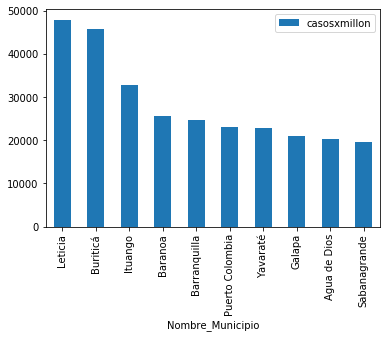

In [74]:
#casos_activos_poblacion['casosxmillon'].sort_values(ascending=False).head(10).plot(kind='bar')
casos_activos_poblacion.sort_values(by='casosxmillon',ascending=False).head(10).plot(x='Nombre_Municipio',y='casosxmillon',kind='bar')

In [75]:
casos_activos_poblacion.groupby('Clima')['casosxmillon'].sum().reset_index()

,Clima,casosxmillon
0,Cálido húmedo,859208.567820
1,Cálido seco,364935.593962
2,Frío,274532.906950
3,Templado,534829.179685


---------------------

### Geo locations of Colombia

In [76]:
geo=pd.read_csv('geo_municipios.csv')
geo.head(3)

,codigo_departamento,codigo_dpto_mpio,codigo_centro_poblado,nombre_departamento,nombre_municipio,nombre_centro_poblado,nombre_tipo_ctro_pbdo,longitud,latitud,nombre_distrito,tipo_municipio,nombre_area_metro
5,5001,5001000,ANTIOQUIA,MEDELLIN,MEDELLIN,CABECERA MUNICIPAL,-75.581713,6.246716,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRA,NaN
5,5001,5001001,ANTIOQUIA,MEDELLIN,PALMITAS,CENTRO POBLADO,-75.690039,6.343341,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRA,NaN
5,5001,5001004,ANTIOQUIA,MEDELLIN,SANTA ELENA,CENTRO POBLADO,-75.501914,6.209718,NaN,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRA,NaN


In [77]:
#adding values to latitud 
geo.latitud=geo.nombre_tipo_ctro_pbdo

In [78]:
#removing the index because we have dupplicated index
geo.reset_index(drop=True,inplace=True)

In [79]:
geo[geo['codigo_departamento']==99773]

,codigo_departamento,codigo_dpto_mpio,codigo_centro_poblado,nombre_departamento,nombre_municipio,nombre_centro_poblado,nombre_tipo_ctro_pbdo,longitud,latitud,nombre_distrito,tipo_municipio,nombre_area_metro
7867,99773,99773000,VICHADA,CUMARIBO,CUMARIBO,CABECERA MUNICIPAL,-69.795533,4.446352,-69.795533,MUNICIPIO,NaN,NaN
7868,99773,99773001,VICHADA,CUMARIBO,PALMARITO,CENTRO POBLADO,-69.289190,4.618637,-69.289190,MUNICIPIO,NaN,NaN
7869,99773,99773002,VICHADA,CUMARIBO,EL VIENTO,CENTRO POBLADO,-71.069750,4.586128,-71.069750,MUNICIPIO,NaN,NaN
7870,99773,99773003,VICHADA,CUMARIBO,TRES MATAS,CENTRO POBLADO,-70.668986,4.493681,-70.668986,MUNICIPIO,NaN,NaN
7871,99773,99773004,VICHADA,CUMARIBO,AMANAVEN,CENTRO POBLADO,-67.716000,4.047000,-67.716000,MUNICIPIO,NaN,NaN
7872,99773,99773005,VICHADA,CUMARIBO,CHUPAVE,CENTRO POBLADO,-70.221666,4.067479,-70.221666,MUNICIPIO,NaN,NaN
7873,99773,99773008,VICHADA,CUMARIBO,GUANAPE,CENTRO POBLADO,-69.798690,4.444440,-69.798690,MUNICIPIO,NaN,NaN
7874,99773,99773010,VICHADA,CUMARIBO,PUERTO PRINCIPE,CENTRO POBLADO,-70.588539,3.824488,-70.588539,MUNICIPIO,NaN,NaN
7875,99773,99773013,VICHADA,CUMARIBO,PUERTO NARINO,CENTRO POBLADO,-67.834867,4.956239,-67.834867,MUNICIPIO,NaN,NaN
7876,99773,99773015,VICHADA,CUMARIBO,SANTA RITA,CENTRO POBLADO,-68.366465,4.864427,-68.366465,MUNICIPIO,NaN,NaN


Notice we have different names for nombre_departamento and nombre_municipio, we're only interested on those who match

In [80]:
# #looking for the index that match on 'nombre_departamento' and'nombre_municipio'
# geo_idx=[]
# for nombre in geo.index:
#     if geo['nombre_departamento'][nombre]==geo['nombre_municipio'][nombre]:
#         geo_idx.append(nombre)

print(geo[geo['nombre_centro_poblado']=='CABECERA MUNICIPAL'].isnull().any())
geo[geo['nombre_centro_poblado']=='CABECERA MUNICIPAL']

codigo_departamento      False
codigo_dpto_mpio         False
codigo_centro_poblado    False
nombre_departamento      False
nombre_municipio         False
nombre_centro_poblado    False
nombre_tipo_ctro_pbdo    False
longitud                 False
latitud                  False
nombre_distrito          False
tipo_municipio            True
nombre_area_metro         True
dtype: bool


,codigo_departamento,codigo_dpto_mpio,codigo_centro_poblado,nombre_departamento,nombre_municipio,nombre_centro_poblado,nombre_tipo_ctro_pbdo,longitud,latitud,nombre_distrito,tipo_municipio,nombre_area_metro
0,5001,5001000,ANTIOQUIA,MEDELLIN,MEDELLIN,CABECERA MUNICIPAL,-75.581713,6.246716,-75.581713,MUNICIPIO,AREA METROPOLITANA DEL VALLE DE ABURRA,NaN
29,5002,5002000,ANTIOQUIA,ABEJORRAL,ABEJORRAL,CABECERA MUNICIPAL,-75.428738,5.789304,-75.428738,MUNICIPIO,NaN,NaN
33,5004,5004000,ANTIOQUIA,ABRIAQUI,ABRIAQUI,CABECERA MUNICIPAL,-76.064703,6.631806,-76.064703,MUNICIPIO,NaN,NaN
35,5021,5021000,ANTIOQUIA,ALEJANDRIA,ALEJANDRIA,CABECERA MUNICIPAL,-75.141333,6.376066,-75.141333,MUNICIPIO,NaN,NaN
36,5030,5030000,ANTIOQUIA,AMAGA,AMAGA,CABECERA MUNICIPAL,-75.701946,6.038809,-75.701946,MUNICIPIO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7848,97666,97666000,VAUPES,TARAIRA,TARAIRA,CABECERA MUNICIPAL,-69.639004,-0.569386,-69.639004,MUNICIPIO,NaN,NaN
7853,99001,99001000,VICHADA,PUERTO CARRENO,PUERTO CARRENO,CABECERA MUNICIPAL,-67.486997,6.186864,-67.486997,MUNICIPIO,NaN,NaN
7861,99524,99524000,VICHADA,LA PRIMAVERA,LA PRIMAVERA,CABECERA MUNICIPAL,-70.410420,5.486338,-70.410420,MUNICIPIO,NaN,NaN
7865,99624,99624000,VICHADA,SANTA ROSALIA,SANTA ROSALIA,CABECERA MUNICIPAL,-70.859741,5.136431,-70.859741,MUNICIPIO,NaN,NaN


In [81]:
geo[geo['nombre_centro_poblado']=='CABECERA MUNICIPAL']['codigo_departamento'].value_counts().unique()

array([1], dtype=int64)

In [82]:
#Updating geo DataFrame
geo_idx=geo[geo['nombre_centro_poblado']=='CABECERA MUNICIPAL'].index
geo=geo.loc[geo_idx]

In [83]:
#Renaming codigo_departamento to Código DIVIPOLA, for future merge with casos_activos_poblacion DataFrame
geo.rename(columns={'codigo_departamento':'Código DIVIPOLA'}, inplace=True)

In [84]:
#We are keeping codigo_departamento(Código DIVIPOLA) nombre_departamento longitud and latitud
geo=geo[['Código DIVIPOLA','nombre_departamento', 'longitud', 'latitud']]
geo.head()

,Código DIVIPOLA,nombre_departamento,longitud,latitud
0,5001,MEDELLIN,6.246716,-75.581713
29,5002,ABEJORRAL,5.789304,-75.428738
33,5004,ABRIAQUI,6.631806,-76.064703
35,5021,ALEJANDRIA,6.376066,-75.141333
36,5030,AMAGA,6.038809,-75.701946


In [85]:
geo.isnull().any()

Código DIVIPOLA        False
nombre_departamento    False
longitud               False
latitud                False
dtype: bool

In [86]:
geo[geo['Código DIVIPOLA']==11001]

,Código DIVIPOLA,nombre_departamento,longitud,latitud
842,11001,"BOGOTA, D.C.",4.650173,-74.107359


Merging geo with casos_activos_poblacion

In [87]:
geo_casos_activos=casos_activos_poblacion.merge(geo,how='left',on='Código DIVIPOLA')
geo_casos_activos.head()

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud,casosxmillon,nombre_departamento,longitud,latitud
0,91001,2386,Leticia,49737,Cálido húmedo,96,47972.334479,LETICIA,-4.199837,-69.941427
1,5113,442,Buriticá,9634,Templado,1643,45879.177912,BURITICA,6.719735,-75.907535
2,5361,915,Ituango,27789,Templado,1575,32926.697614,ITUANGO,7.171629,-75.764673
3,8078,1714,Baranoa,67050,Cálido húmedo,100,25563.012677,BARANOA,10.794880,-74.916100
4,8001,31540,Barranquilla,1274250,Cálido húmedo,24,24751.814793,BARRANQUILLA,10.975927,-74.795259


In [88]:
geo_casos_activos.isnull().any()

Código DIVIPOLA        False
total_casos_activos    False
Nombre_Municipio       False
Población              False
Clima                  False
Altitud                False
casosxmillon           False
nombre_departamento     True
longitud                True
latitud                 True
dtype: bool

In [89]:
temp=geo_casos_activos[(geo_casos_activos['longitud'].isnull())|(geo_casos_activos['latitud'].isnull())]

temp

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud,casosxmillon,nombre_departamento,longitud,latitud
6,97889,25,Yavaraté,1097,Cálido húmedo,97,22789.425706,NaN,NaN,NaN
121,91405,13,La Chorrera,2955,Cálido húmedo,370,4399.323181,NaN,NaN,NaN
183,91407,11,La Pedrera,3947,Cálido húmedo,119,2786.926780,NaN,NaN,NaN
265,94663,2,Mapiripana,1071,Cálido húmedo,202,1867.413632,NaN,NaN,NaN
401,94883,2,San Felipe,1743,Cálido húmedo,70,1147.446931,NaN,NaN,NaN
619,94884,1,Puerto Colombia,1984,Cálido húmedo,5,504.032258,NaN,NaN,NaN
789,91798,1,Tarapacá,3939,Cálido húmedo,54,253.871541,NaN,NaN,NaN


In [90]:
print('We have {} values without longitud or latitud'.format(len(temp)))

We have 7 values without longitud or latitud


In [91]:
temp['Nombre_Municipio'].unique()
#Create a DataFrame that contains 

array(['Yavaraté', 'La Chorrera', 'La Pedrera', 'Mapiripana',
       'San Felipe', 'Puerto Colombia', 'Tarapacá'], dtype=object)

In [92]:
geo_casos_activos['nombre_departamento']=geo_casos_activos['Nombre_Municipio'].progress_apply(lambda x: x.upper()+' COLOMBIA')

In [93]:
#Testing adding latitude and logitude if there is a nan in those columns

#uncomment for check example
# print(geolocator.geocode("Barranquilla Colombia")[1])
# (geolocator.geocode("Barranquilla Colombia").latitude,geolocator.geocode("Bogotá Colombia").longitude)

# uncomment for look in the DataFrame
# geo_casos_activos.progress_apply(lambda x: (geolocator.geocode(x.nombre_departamento))[1] if (pd.isna(x.longitud))|(pd.isna(x.latitud)) else (x.longitud,x.latitud),axis=1)

geo_casos_activos['latitud2']=geo_casos_activos.progress_apply(lambda x: (geolocator.geocode(x.nombre_departamento)).latitude if (pd.isna(x.longitud)) else x.longitud, axis=1)
geo_casos_activos['longitud2']=geo_casos_activos.progress_apply(lambda x: (geolocator.geocode(x.nombre_departamento)).longitude if (pd.isna(x.latitud)) else x.latitud, axis=1)

In [94]:
geo_casos_activos

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud,casosxmillon,nombre_departamento,longitud,latitud,latitud2,longitud2
0,91001,2386,Leticia,49737,Cálido húmedo,96,47972.334479,LETICIA COLOMBIA,-4.199837,-69.941427,-4.199837,-69.941427
1,5113,442,Buriticá,9634,Templado,1643,45879.177912,BURITICÁ COLOMBIA,6.719735,-75.907535,6.719735,-75.907535
2,5361,915,Ituango,27789,Templado,1575,32926.697614,ITUANGO COLOMBIA,7.171629,-75.764673,7.171629,-75.764673
3,8078,1714,Baranoa,67050,Cálido húmedo,100,25563.012677,BARANOA COLOMBIA,10.794880,-74.916100,10.794880,-74.916100
4,8001,31540,Barranquilla,1274250,Cálido húmedo,24,24751.814793,BARRANQUILLA COLOMBIA,10.975927,-74.795259,10.975927,-74.795259
...,...,...,...,...,...,...,...,...,...,...,...,...
919,76126,1,Calima,18266,Templado,1485,54.746524,CALIMA COLOMBIA,3.933524,-76.484392,3.933524,-76.484392
920,73067,1,Ataco,19117,Cálido seco,446,52.309463,ATACO COLOMBIA,3.590636,-75.382534,3.590636,-75.382534
921,13473,1,Morales,23348,Cálido seco,25,42.830221,MORALES COLOMBIA,8.276307,-73.868140,8.276307,-73.868140
922,19397,1,La Vega,24642,Frío,2136,40.581122,LA VEGA COLOMBIA,2.001109,-76.778897,2.001109,-76.778897


In [95]:
geo_casos_activos['Nombre_Municipio'].isnull().any()

False

Aternate aproaches to look for the longitude and latitude

In [96]:
#geo_casos_activos['latitud2']=geo_casos_activos['nombre_departamento'].progress_apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) != None else 'NF')
#geo_casos_activos['longitud2']=geo_casos_activos['nombre_departamento'].progress_apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) != None else 'NF')

#geo_casos_activos[geo_casos_activos['latitud2']=='NF']

In [97]:
# a=np.where((geo_casos_activos.longitud.isna())|(geo_casos_activos.latitud.isna()),geo_casos_activos.Nombre_Municipio,(geo_casos_activos.longitud,geo_casos_activos.latitud))
# pd.DataFrame(a)

---------------------------

### Ploting on map

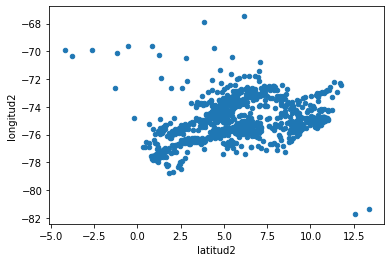

In [98]:
geo_casos_activos.plot(kind="scatter", x="latitud2", y="longitud2")

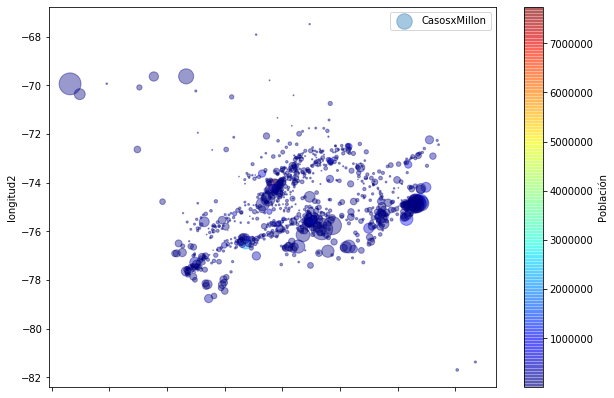

In [99]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
geo_casos_activos.plot(kind="scatter", x="latitud2", y="longitud2",
    s=geo_casos_activos['casosxmillon']/100, label="CasosxMillon",
    c='Población', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()

In [100]:
def generateBaseMap(default_location=[4.00,-72.00], default_zoom_start=6.4):
    base_map = folium.Map(location=default_location,tiles='cartodbdark_matter', control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [101]:
base_map=generateBaseMap()

In [102]:
from folium.plugins import HeatMap

#HeatMap(data=df[['longitud', 'latitud', 'casosxmillon']].groupby(['longitud', 'latitud']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

HeatMap(data=geo_casos_activos[['latitud2','longitud2', 'casosxmillon']].values.tolist(),radius=8, max_zoom=13).add_to(base_map)

# for i in range(0,len(geo_casos_activos)):
#     HeatMap(
#         data=[geo_casos_activos.iloc[i]['longitud2'], geo_casos_activos.iloc[i]['latitud2']],
#         popup=geo_casos_activos.iloc[i]['Nombre_Municipio'],
#         radius=geo_casos_activos.iloc[i]['casosxmillon']).add_to(base_map)

In [103]:
base_map

In [104]:
geo_casos_activos.reset_index(drop=True,inplace=True)

In [105]:
colombia = folium.Map(location=[4.00,-72.00],zoom_start=6.4)

for i in range(0,len(geo_casos_activos)):
    folium.Circle(
        location=[geo_casos_activos.iloc[i]['longitud2'], geo_casos_activos.iloc[i]['latitud2']],
        popup=(unidecode.unidecode(geo_casos_activos.iloc[i]['Nombre_Municipio']),
               int(geo_casos_activos.iloc[i]['casosxmillon']),
               unidecode.unidecode('Clima: '+geo_casos_activos.iloc[i]['Clima']),
               'Altitud: '+ str(geo_casos_activos.iloc[i]['Altitud'])+'m'),
        radius=geo_casos_activos.iloc[i]['casosxmillon'],
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(colombia)

colombia

In [106]:
geo_casos_activos.iloc[[6,121,183,265,401,619,789]]

,Código DIVIPOLA,total_casos_activos,Nombre_Municipio,Población,Clima,Altitud,casosxmillon,nombre_departamento,longitud,latitud,latitud2,longitud2
6,97889,25,Yavaraté,1097,Cálido húmedo,97,22789.425706,YAVARATÉ COLOMBIA,NaN,NaN,0.831421,-69.634244
121,91405,13,La Chorrera,2955,Cálido húmedo,370,4399.323181,LA CHORRERA COLOMBIA,NaN,NaN,-1.282386,-72.637698
183,91407,11,La Pedrera,3947,Cálido húmedo,119,2786.926780,LA PEDRERA COLOMBIA,NaN,NaN,-1.195097,-70.088776
265,94663,2,Mapiripana,1071,Cálido húmedo,202,1867.413632,MAPIRIPANA COLOMBIA,NaN,NaN,2.806145,-70.478000
401,94883,2,San Felipe,1743,Cálido húmedo,70,1147.446931,SAN FELIPE COLOMBIA,NaN,NaN,10.972985,-74.809748
619,94884,1,Puerto Colombia,1984,Cálido húmedo,5,504.032258,PUERTO COLOMBIA COLOMBIA,NaN,NaN,10.996559,-74.916248
789,91798,1,Tarapacá,3939,Cálido húmedo,54,253.871541,TARAPACÁ COLOMBIA,NaN,NaN,-2.610009,-69.934121


In [107]:
#Example adding radius to heatmap using folium

# import random
# from folium import plugins

# data = [[41.895278,12.482222,2873494.0,20.243001,20414,7.104243],
#         [41.883850,12.333330,3916.0,0.835251,4,1.021450],
#         [41.854241,12.567000,22263.0,1.132390,35,1.572115],
#         [41.902147,12.590388,19505.0,0.839181,37,1.896950],
#         [41.994240,12.48520,16239.0,1.383981,25,1.539504]]

# dfdfdf = pd.DataFrame(columns=['latitude','longitude','population','radius','count','normalized'],data=data)

# middle_lat = dfdfdf['latitude'].median()
# middle_lon = dfdfdf['longitude'].median()
# m = folium.Map(location=[middle_lat, middle_lon],tiles = "Stamen Terrain",zoom_start=11)

# # convert to (n, 2) nd-array format for heatmap
# points = dfdfdf[['latitude', 'longitude', 'normalized']].dropna().values

# # plot heatmap
# #plugins.HeatMap(points, radius=15).add_to(m)

# pointArrays = np.split(points, len(points))
# radii = [5, 10, 15, 20, 25]

# for point, radius in zip(pointArrays, radii):
#     plugins.HeatMap(point, radius=radius).add_to(m)

In [126]:
# mp = folium.Map(location=[middle_lat, middle_lon],tiles = "Stamen Terrain",zoom_start=11)
mp = folium.Map(location=[4.00,-72.00],zoom_start=6.4,tiles='cartodbdark_matter')

points = geo_casos_activos[['longitud','latitud','casosxmillon']].dropna().values

pointArrays = np.split(points, len(points))
radio=(geo_casos_activos['casosxmillon']/1000).tolist()

for point, radius in zip(pointArrays, radio):
    HeatMap(point,radius=radius).add_to(mp)
    
mp.save(outfile='casos_activos_heatmap.html')

In [127]:
print(tuple(zip(pointArrays, radio)))

((array([[-4.19983693e+00, -6.99414267e+01,  4.79723345e+04]]), 47.972334479361436), (array([[ 6.71973517e+00, -7.59075347e+01,  4.58791779e+04]]), 45.87917791156322), (array([[ 7.17162903e+00, -7.57646732e+01,  3.29266976e+04]]), 32.92669761416388), (array([[ 1.07948805e+01, -7.49160998e+01,  2.55630127e+04]]), 25.563012677106634), (array([[ 1.09759268e+01, -7.47952590e+01,  2.47518148e+04]]), 24.751814793015498), (array([[ 1.10229401e+01, -7.48519636e+01,  2.31504781e+04]]), 23.150478107700053), (array([[ 1.09196410e+01, -7.48669381e+01,  2.09038958e+04]]), 22.789425706472198), (array([[ 4.37531202e+00, -7.46692178e+01,  2.02028398e+04]]), 20.903895793855657), (array([[ 1.07910759e+01, -7.47585072e+01,  1.96670847e+04]]), 20.202839756592294), (array([[ 5.89975136e+00, -7.61422299e+01,  1.93619094e+04]]), 19.667084710979363), (array([[ 1.07560563e+01, -7.47541119e+01,  1.93125000e+04]]), 19.361909400876765), (array([[ 1.09101745e+01, -7.47848334e+01,  1.84204709e+04]]), 19.3125), (arr

In [128]:
mp